<a href="https://colab.research.google.com/github/martinpius/Applied-Predictive-Modeling2/blob/master/The_RNN_reloaded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using Google colaboratory with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = FALSE
  print(f"{type(e)} {e}\n...Please Load Your Drive...")

def time_fmt(x):
  h = int(x / (60 * 60))
  m = int(x % (60 * 60) / 60)
  s = int(x % 60)
  return f"{h}: {m:>03}: {s:>05.2f}"

time_fmt(124.1718)

Mounted at /content/drive
You are using Google colaboratory with tensorflow version: 2.4.0


'0: 002: 04.00'

In [2]:
#The RNN has been useful in learning patterns in a sequence data or time-series data
#Great achievement is seen in text, video and music generations, machine translation and time series forecasting
#Many other applications can also be done using RNN eg survival prediction etc

In [3]:
#The RNN cell uses a for loop to repeat over a number of times while maintaining the internal state of the cell
#that hold the informations derived from the previous step

In [4]:
#The simple LSTM layer (inbuilt):
import numpy as np
import tensorflow as tf


Model: "rnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1000, 64)          64000     
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                33024     
_________________________________________________________________
reshape (Reshape)            (None, 8, 8)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               70144     
_________________________________________________________________
dense1 (Dense)               (None, 1024)              132096    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0       

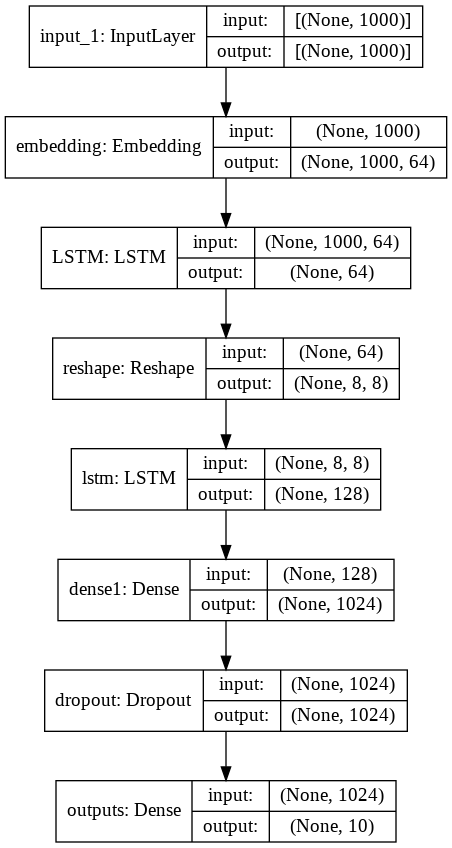

In [5]:
inputs = tf.keras.Input(shape = (1000,))
x = tf.keras.layers.Embedding(input_dim = 1000, output_dim = 64, name = 'embedding')(inputs)
x = tf.keras.layers.LSTM(units = 64, name = 'LSTM')(x)
x = tf.keras.layers.Reshape((8,8))(x)
x = tf.keras.layers.LSTM(units = 128)(x)
x = tf.keras.layers.Dense(units = 1024, activation = 'relu', name = 'dense1')(x)
x = tf.keras.layers.Dropout(rate = 0.5, name = 'dropout')(x)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax', name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'rnn')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'rnn_simple.png', show_shapes = True)


In [6]:
#Returning output at every timestep for each sample.

Model: "simple_rnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
embedding (Embedding)        (None, 10000, 100)        1000000   
_________________________________________________________________
LSTM_1 (LSTM)                (None, 10000, 128)        117248    
_________________________________________________________________
LSTM_2 (LSTM)                (None, 10000, 64)         49408     
_________________________________________________________________
RNN (SimpleRNN)              (None, 10000, 1024)       1115136   
_________________________________________________________________
dense_layer (Dense)          (None, 10000, 1024)       1049600   
_________________________________________________________________
dropout (Dropout)            (None, 10000, 1024)       0

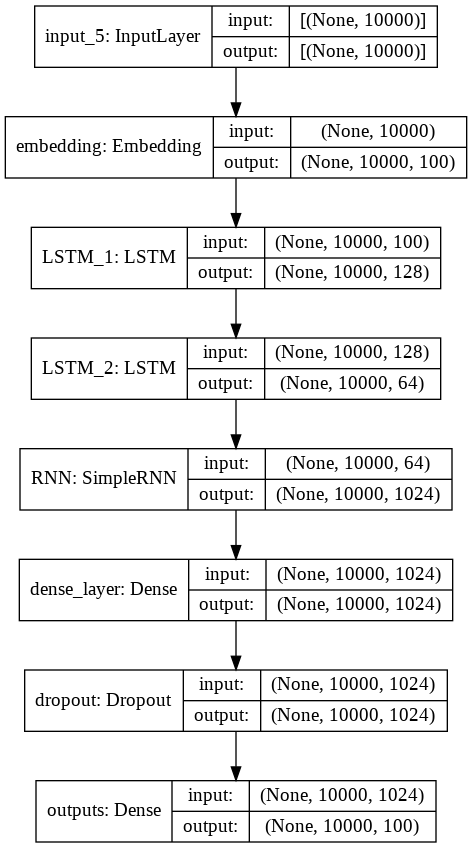

In [10]:
inputs = tf.keras.Input(shape = (10000,))
x = tf.keras.layers.Embedding(input_dim = 10000, output_dim = 100, name = 'embedding')(inputs)
x = tf.keras.layers.LSTM(units = 128, 
                         kernel_initializer = 'random_normal',
                         recurrent_dropout = 0.5, 
                         dropout = 0.25,return_sequences= True, name = 'LSTM_1')(x)
#x = tf.keras.layers.Reshape((8,16))(x)
x = tf.keras.layers.LSTM(units = 64, 
                         kernel_initializer = 'random_normal',
                         dropout = 0.5, 
                         recurrent_dropout = 0.25, 
                         return_sequences = True, name = 'LSTM_2')(x)
x = tf.keras.layers.SimpleRNN(units = 1024,
                              return_sequences=True,
                              kernel_initializer = 'random_normal',
                              recurrent_dropout = 0.5,
                              dropout = 0.5, name = 'RNN')(x)
x = tf.keras.layers.Dense(units = 1024,
                          kernel_initializer = 'random_normal',
                          activation = 'relu', name = 'dense_layer')(x)
x = tf.keras.layers.Dropout(rate = 0.5, name = 'dropout')(x)
outputs = tf.keras.layers.Dense(units = 100, activation = 'softmax', name = 'outputs')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'simple_rnn')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'simple_rnn.png', show_shapes = True)
